# **Semana 01 - Equipe DS**

## **Extração e Carregamento dos Dados**

O objetivo principal deste notebook é fornecer ao time uma base padronizada e validada, pronta para uso nas tarefas da Semana 01:

- Qualidade e Estrutura dos Dados   
- Distribuições e Comportamento das Variáveis  
- Correlações e Relações Entre Variáveis  
- Sazonalidade (Tempo: Mês, Dia, Horário)  
- Segmentação (Companhias & Aeroportos)

In [1]:
# Instalar gdown (baixa arquivos do Google Drive por ID)
!pip install -q gdown
!pip install -q unidecode

# Import de bibliotecas essenciais
import gdown
import os
import zipfile
import pandas as pd
import numpy as np
import glob
import unidecode
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados

In [2]:
# ID do Dataset
#https://drive.google.com/file/d/1207psedBKvnS0pJkDITroSzPiWrcz0ag/view?usp=sharing
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo que será baixado no Colab
zip_path = "dados_vra.zip"

# Se ainda não existir o zip, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Extrair o conteúdo do zip
extract_folder = "dados_vra"

if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")

Arquivo ZIP já existe, download interrompido.
Pasta de dados já existe.


In [3]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Encontrar arquivos
    caminho_busca = os.path.join(pasta, padrao)
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Ler e validar estrutura
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # Define colunas de referência com o primeiro arquivo
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Compara colunas dos demais arquivos
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Concatenar tudo
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída. \nShape final: {df_final.shape}")

    return df_final


## Validação do dataset

In [4]:
# Checagem se todos os arquivos serão importados e concatenados
caminho = "/content/dados_vra/dados_vra/VRA_*.csv"

arquivos = glob.glob(caminho)
print(len(arquivos), "arquivos encontrados")

total_linhas = 0
for arq in arquivos:
    df_temp = pd.read_csv(arq, sep=";", skiprows=1, low_memory=False)
    total_linhas += df_temp.shape[0]

print("\nTotal de linhas esperado:", total_linhas)

0 arquivos encontrados

Total de linhas esperado: 0


In [5]:
df = carregar_vra(pasta="dados_vra/dados_vra", padrao="VRA_*.csv")
linhas_importadas = df.shape[0]
print("Total de linhas importadas: ", linhas_importadas)


54 arquivos encontrados:
Colunas de referência definidas.


C:\Users\Enoque Mandlate\AppData\Local\Temp\ipykernel_7824\656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
C:\Users\Enoque Mandlate\AppData\Local\Temp\ipykernel_7824\656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
C:\Users\Enoque Mandlate\AppData\Local\Temp\ipykernel_7824\656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
C:\Users\Enoque Mandlate\AppData\Local\Temp\ipykernel_7824\656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
C:\Users\Enoque Mandlate\AppData\Local\Temp\ipykernel_7824\656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd


Concatenação concluída. 
Shape final: (3968418, 12)
Total de linhas importadas:  3968418


In [6]:
if total_linhas == linhas_importadas:
    print("Total de linhas importadas é igual ao total esperado. Prossiga com a analise\n\n\n")
    display(df.head())
else:
    print("Total de linhas importadas é diferente do total esperado. Verifique o código")

Total de linhas importadas é diferente do total esperado. Verifique o código


## Padronização dos Nomes das Variáveis

In [7]:
df.columns

Index(['ICAO Empresa AÃ©rea', 'NÃºmero Voo', 'CÃ³digo AutorizaÃ§Ã£o (DI)',
       'CÃ³digo Tipo Linha', 'ICAO AerÃ³dromo Origem',
       'ICAO AerÃ³dromo Destino', 'Partida Prevista', 'Partida Real',
       'Chegada Prevista', 'Chegada Real', 'SituaÃ§Ã£o Voo',
       'CÃ³digo Justificativa'],
      dtype='object')

In [8]:
df.columns = [c.encode("latin1").decode("utf-8") for c in df.columns]
df.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

In [9]:
mapa_colunas = {
    "ICAO Empresa Aérea" : "empresa_aerea",
    "Número Voo" : "numero_voo",
    "Código Autorização (DI)" : "codigo_autorizacao_di",
    "Código Tipo Linha" : "codigo_tipo_linha",
    "ICAO Aeródromo Origem" : "aerodromo_origem",
    "ICAO Aeródromo Destino" : "aerodromo_destino",
    "Partida Prevista" : "partida_prevista",
    "Partida Real" : "partida_real",
    "Chegada Prevista" : "chegada_prevista",
    "Chegada Real" : "chegada_real",
    "Situação Voo" : "situacao_voo",
    "Código Justificativa" : "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)
df.columns

Index(['empresa_aerea', 'numero_voo', 'codigo_autorizacao_di',
       'codigo_tipo_linha', 'aerodromo_origem', 'aerodromo_destino',
       'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'codigo_justificativa'],
      dtype='object')

## Dicionário de Variáveis

A tabela abaixo descreve cada coluna do dataset, com seu nome padronizado no notebook, o nome original fornecido pela ANAC e sua definição oficial.

| Nome Padronizado | Nome Original ANAC | Descrição |
|------------------|--------------------|-----------|
| `empresa_aerea` | Sigla ICAO Empresa Aérea | Sigla/designador ICAO da empresa aérea responsável pelo voo. |
| `numero_voo` | Número Voo | Numeração identificadora do voo. |
| `codigo_autorizacao_di` | Código DI | Dígito Identificador (DI) utilizado para identificar a etapa do voo. |
| `codigo_tipo_linha` | Código Tipo Linha | Identifica o tipo de linha/serviço prestado no voo. |
| `aerodromo_origem` | ICAO Aeródromo Origem| Sigla ICAO Aeroporto Origem |
| `aerodromo_destino` | ICAO Aeródromo Destino| Sigla ICAO Aeroporto Destino |
| `partida_prevista` | Partida Prevista | Data e horário programados da partida (horário de Brasília). |
| `partida_real` | Partida Real | Data e horário reais da partida. |
| `chegada_prevista` | Chegada Prevista | Data e horário programados da chegada (horário de Brasília). |
| `chegada_real` | Chegada Real | Data e horário reais da chegada. |
| `situacao_voo` | Situação do voo | Indica se o voo foi realizado, cancelado ou não informado. |
| `justificativa` | Justificativa | Motivo reportado para irregularidades. Campo descontinuado após abr/2020. |
| `situacao_partida` | Situação Partida | (variavel alvo a ser definida) Categoria de pontualidade da partida (Antecipado, Pontual, Atrasos por faixas). |

Fonte: https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/voo-regular-ativo-vra/62-voo-regular-ativo-vra

## Criação da Variável-Alvo

Com base na diferença entre a partida real e prevista, categorizamos cada voo conforme
as regras da ANAC:
- Antecipado
- Pontual
- Atraso 30-60
- Atraso 60-120
- Atraso 120-240
- Atraso > 240

In [10]:
# Padronização das variaveis para calculo da situação da partida
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"] = pd.to_datetime(df["partida_real"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["atraso_partida_min"] = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60

In [11]:
# Calculo da situação da parte conforme dados da ANAC
def classificar_situacao_partida(minutos):
    if pd.isna(minutos):
        return "Nao informado"
    if minutos < 0:
        return "Antecipado"
    if minutos <= 15:
        return "Pontual"
    if 15 < minutos <= 60:
        return "Atraso 30-60"
    if 60 < minutos <= 120:
        return "Atraso 60-120"
    if 120 < minutos <= 240:
        return "Atraso 120-240"
    return "Atraso > 240"

In [12]:
df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

In [13]:
df.head()

,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,atraso_partida_min,situacao_partida
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN,-4.0,Antecipado
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN,-1.0,Antecipado
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN,2.0,Pontual
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN,-1.0,Antecipado
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN,-9.0,Antecipado


In [14]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Nao informado', 'Atraso 30-60',
       'Atraso 60-120', 'Atraso 120-240', 'Atraso > 240'], dtype=object)

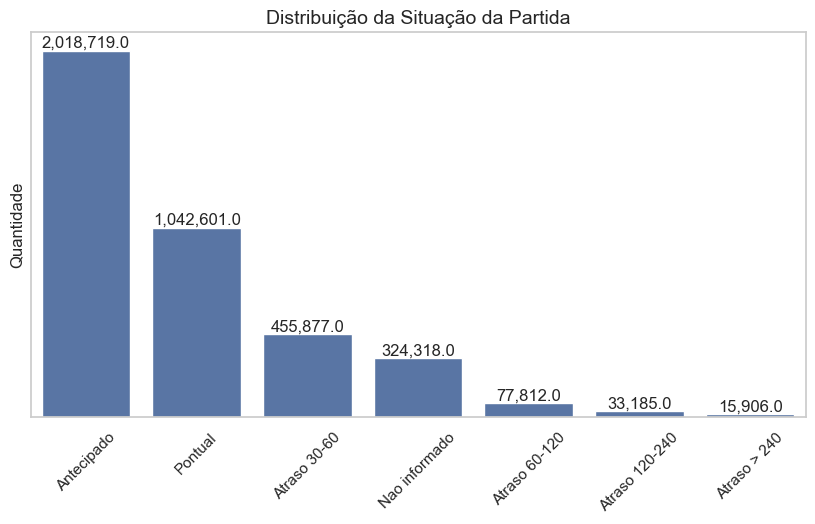

In [15]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [16]:
df.to_csv("dataset_final.zip",
          index=False,
          compression="zip",
          encoding="utf-8")

# DS5 – Segmentação (Companhias e Aeroportos)

## Ranking das companhias com maior taxa de atraso


In [17]:
df.head()

,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,atraso_partida_min,situacao_partida
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN,-4.0,Antecipado
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN,-1.0,Antecipado
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN,2.0,Pontual
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN,-1.0,Antecipado
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN,-9.0,Antecipado


### Total de voos por companhia

In [18]:
total_voos = df.groupby('empresa_aerea').size().reset_index(name='total_voos')

In [19]:
total_voos.sort_values(by="total_voos", ascending=False)

,empresa_aerea,total_voos
33,AZU,1300179
150,TAM,1042334
75,GLO,917689
8,ACN,87812
123,PTB,63394
...,...,...
24,AUZ,2
163,TVS,2
0,1DE,2
49,CRX,1


### Total de voos atrasados por companhia

In [20]:
voos_atrasados = df[df['atraso_partida_min'] > 0].groupby('empresa_aerea').size().reset_index(name='voos_atrasados')


In [21]:
voos_atrasados.sort_values(by="voos_atrasados", ascending=False)

,empresa_aerea,voos_atrasados
30,AZU,425643
131,TAM,374097
65,GLO,326429
132,TAP,24036
43,CMP,23429
...,...,...
21,ATG,2
115,RSB,1
94,MBK,1
18,ARL,1


### Unir as informações(Merge)

In [22]:
ranking = total_voos.merge(
    voos_atrasados,
    on='empresa_aerea',
    how='left'
)


In [23]:
ranking.sort_values(by="voos_atrasados", ascending=False)

,empresa_aerea,total_voos,voos_atrasados
33,AZU,1300179,425643.0
150,TAM,1042334,374097.0
75,GLO,917689,326429.0
151,TAP,34214,24036.0
47,CMP,31998,23429.0
...,...,...,...
164,TXC,9,NaN
167,UCG,4,NaN
170,URO,12,NaN
171,USY,2,NaN


### Calcular a taxa de atraso

In [24]:
ranking['voos_atrasados'] = ranking['voos_atrasados'].fillna(0)

In [25]:
ranking['taxa_atraso'] = (
    round(ranking['voos_atrasados'] / ranking['total_voos'], 2)
)


In [26]:
ranking

,empresa_aerea,total_voos,voos_atrasados,taxa_atraso
0,1DE,2,2.0,1.00
1,1ED,29,5.0,0.17
2,AAL,17602,6644.0,0.38
3,ABB,98,22.0,0.22
4,ABD,197,84.0,0.43
...,...,...,...,...
173,VDA,28,10.0,0.36
174,VTU,14,4.0,0.29
175,VVC,530,44.0,0.08
176,WFL,5,1.0,0.20


In [27]:
ranking_final = ranking.sort_values('taxa_atraso', ascending=False).reset_index(drop=True)

In [28]:
ranking_final

,empresa_aerea,total_voos,voos_atrasados,taxa_atraso
0,1DE,2,2.0,1.0
1,OBS,6,6.0,1.0
2,EPT,2,2.0,1.0
3,EQX,4,4.0,1.0
4,ARN,4,4.0,1.0
...,...,...,...,...
173,MEM,10,0.0,0.0
174,MLM,4,0.0,0.0
175,MSI,16,0.0,0.0
176,RDA,15,0.0,0.0


### Grafico

In [29]:
top10_empresas = (
    ranking
    .sort_values('taxa_atraso', ascending=False)
    .head(10)
)


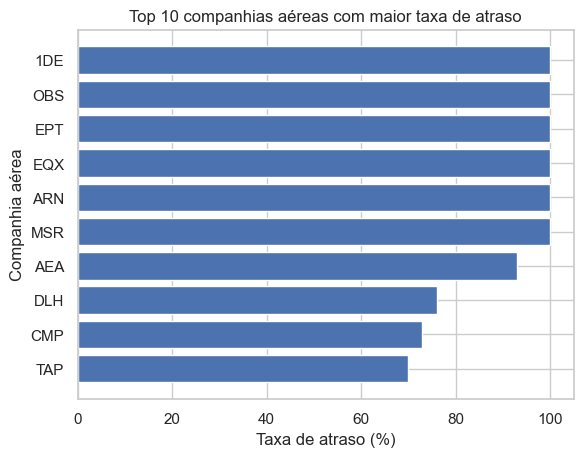

In [30]:
plt.figure()
plt.barh(
    top10_empresas['empresa_aerea'],
    top10_empresas['taxa_atraso'] * 100
)
plt.xlabel('Taxa de atraso (%)')
plt.ylabel('Companhia aérea')
plt.title('Top 10 companhias aéreas com maior taxa de atraso')
plt.gca().invert_yaxis()
plt.show()


Este gráfico apresenta as 10 companhias aéreas com maior taxa de atraso na partida.
A métrica considera a proporção de voos atrasados em relação ao total de voos operados, evitando viés por volume. Observamos que algumas companhias apresentam taxas significativamente superiores à média, indicando possíveis gargalos operacionais.

## Ranking dos aeroportos com mais atrasos (origem/destino)

## Para a origem

### Criar flag de atraso

In [31]:
df['atrasado'] = df['atraso_partida_min'] > 0

### 1. Contar o total de voos por aeroporto de origem

In [32]:
total_voos_origem = (
    df.groupby('aerodromo_origem')
      .size()
      .reset_index(name='total_voos')
)

In [34]:
total_voos_origem

,aerodromo_origem,total_voos
0,BIKF,1
1,CYHM,13
2,CYHZ,1
3,CYLW,1
4,CYMX,45
...,...,...
598,ZHCC,5
599,ZHHH,62
600,ZSJN,13
601,ZSPD,2


### 2. Contar os voos atrasados por aeroporto de origem

In [33]:
voos_atrasados_origem = (
    df[df['atrasado']]
    .groupby('aerodromo_origem')
    .size()
    .reset_index(name='voos_atrasados')
)

In [35]:
voos_atrasados_origem

,aerodromo_origem,voos_atrasados
0,CYHM,1
1,CYMX,11
2,CYUL,519
3,CYXX,1
4,CYYZ,1098
...,...,...
375,VTBS,2
376,VVNB,1
377,ZBAA,117
378,ZHCC,1


### 3. Juntar as duas informações

In [36]:
ranking_origem = total_voos_origem.merge(
    voos_atrasados_origem,
    on='aerodromo_origem',
    how='left'
)

In [37]:
ranking_origem

,aerodromo_origem,total_voos,voos_atrasados
0,BIKF,1,NaN
1,CYHM,13,1.0
2,CYHZ,1,NaN
3,CYLW,1,NaN
4,CYMX,45,11.0
...,...,...,...
598,ZHCC,5,1.0
599,ZHHH,62,NaN
600,ZSJN,13,NaN
601,ZSPD,2,NaN


In [ ]:
# Substituir NaN por 0 (aeroportos sem atraso)
ranking_origem['voos_atrasados'] = ranking_origem['voos_atrasados'].fillna(0)

In [39]:
ranking_origem

,aerodromo_origem,total_voos,voos_atrasados
0,BIKF,1,0.0
1,CYHM,13,1.0
2,CYHZ,1,0.0
3,CYLW,1,0.0
4,CYMX,45,11.0
...,...,...,...
598,ZHCC,5,1.0
599,ZHHH,62,0.0
600,ZSJN,13,0.0
601,ZSPD,2,0.0


### 4. Calcular a taxa de atraso

In [44]:
ranking_origem['taxa_atraso'] = (
    round(ranking_origem['voos_atrasados'] / ranking_origem['total_voos'], 2)
)

In [45]:
# Ordenar pelo maior índice de atraso
ranking_origem = ranking_origem.sort_values(
    by='taxa_atraso',
    ascending=False
)

In [ ]:
# Remover aeroportos com pouco volume
ranking_origem = ranking_origem[ranking_origem['total_voos'] >= 50]
top10_origem = ranking_origem.head(10)

### Gráfico

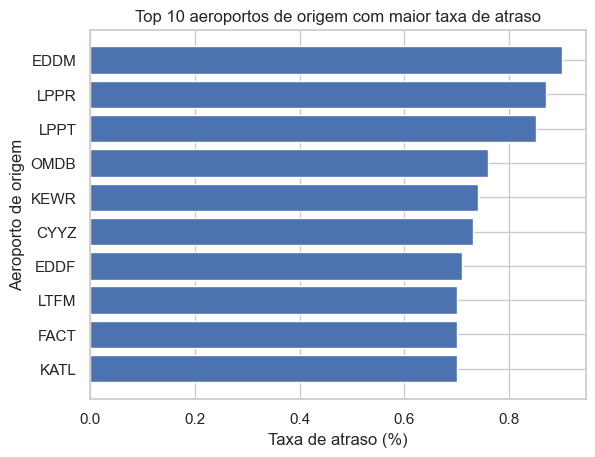

In [96]:
plt.figure()
plt.barh(
    top10_origem['aerodromo_origem'],
    top10_origem['taxa_atraso']
)
plt.xlabel('Taxa de atraso (%)')
plt.ylabel('Aeroporto de origem')
plt.title('Top 10 aeroportos de origem com maior taxa de atraso')
plt.gca().invert_yaxis()
plt.show()

## Para Destino

### Criar atraso na chegada

In [74]:
df['chegada_prevista'] = pd.to_datetime(
    df['chegada_prevista'],
    errors='coerce'
)

df['chegada_real'] = pd.to_datetime(
    df['chegada_real'],
    errors='coerce'
)

In [75]:
df['atraso_chegada'] = (
    (df['chegada_real'] - df['chegada_prevista'])
    .dt.total_seconds() / 60 > 0
)


### 1. Total de voos por aeroporto de destino


In [76]:
total_voos_destino = (
    df.groupby('aerodromo_destino')
      .size()
      .reset_index(name='total_voos')
)

### 2. Total de voos com atraso na chegada por aeroporto de destino

In [77]:
voos_atrasados_destino = (
    df[df['atraso_chegada']]
    .groupby('aerodromo_destino')
    .size()
    .reset_index(name='voos_atrasados')
)

### 3. Unir as informações

In [78]:
ranking_destino = total_voos_destino.merge(
    voos_atrasados_destino,
    on='aerodromo_destino',
    how='left'
)

### 4. Tratar aeroportos sem atraso

In [ ]:
ranking_destino['voos_atrasados'] = ranking_destino['voos_atrasados'].fillna(0)

In [90]:
# Calcular a taxa de atraso
ranking_destino['taxa_atraso'] = (
    round(ranking_destino['voos_atrasados'] / ranking_destino['total_voos'], 2)
)

# Ordenar pelo maior índice de atraso
ranking_destino = ranking_destino.sort_values(
    by='taxa_atraso',
    ascending=False
)

In [91]:
ranking_destino

,aerodromo_destino,total_voos,voos_atrasados,taxa_atraso
0,BIKF,1,1.0,1.0
546,SVMC,1,1.0,1.0
166,LEZL,1,1.0,1.0
179,LIBR,1,1.0,1.0
181,LIMF,1,1.0,1.0
...,...,...,...,...
46,FALA,1,0.0,0.0
418,SDPA,1,0.0,0.0
419,SDPY,1,0.0,0.0
421,SDSV,12,0.0,0.0


In [92]:
ranking_destino = ranking_destino[ranking_destino['total_voos'] >= 50]
top10_destino = ranking_destino.head(10)

In [94]:
top10_destino

,aerodromo_destino,total_voos,voos_atrasados,taxa_atraso
89,KBOS,438,288.0,0.66
496,SNSS,245,148.0,0.60
465,SLVR,3841,2306.0,0.60
550,SVPR,135,81.0,0.60
485,SNLN,379,223.0,0.59
392,SBUY,3385,1897.0,0.56
193,LPPR,957,538.0,0.56
23,EDDM,403,212.0,0.53
200,LTFM,2399,1229.0,0.51
47,FAOR,512,252.0,0.49


### Plotar

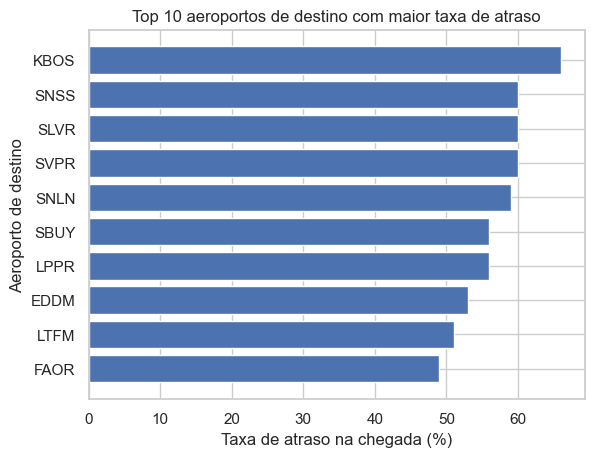

In [93]:
plt.figure()
plt.barh(
    top10_destino['aerodromo_destino'],
    top10_destino['taxa_atraso'] * 100
)
plt.xlabel('Taxa de atraso na chegada (%)')
plt.ylabel('Aeroporto de destino')
plt.title('Top 10 aeroportos de destino com maior taxa de atraso')
plt.gca().invert_yaxis()
plt.show()

### Resposta

Identificamos os aeroportos com maior taxa de atraso tanto na origem quanto no destino. Essa distinção permite separar gargalos operacionais de solo (partida) de restrições de capacidade e fluxo aéreo (chegada). Aeroportos que aparecem em ambos os rankings indicam pontos críticos da malha aérea.

## Identificar gargalos e padrões específicos em companhias e aeroportos

### Aeroportos problemáticos independentemente da companhia

In [98]:
# Taxa de atraso por aeroporto e companhia (origem)
aero_companhia_origem = (
    df.groupby(['aerodromo_origem', 'empresa_aerea'])
      .agg(
          total_voos=('numero_voo', 'count'),
          voos_atrasados=('atrasado', 'sum')
        )
    .reset_index()
)


In [99]:
# Calcular taxa de atraso
aero_companhia_origem['taxa_atraso'] = (
    aero_companhia_origem['voos_atrasados'] /
    aero_companhia_origem['total_voos']
)

In [100]:
# Aeroportos onde múltiplas companhias têm taxa alta
# Critério exemplo:
# ≥ 3 companhias
# taxa de atraso ≥ 30%
# ≥ 50 voos

gargalos_aeroportos = (
    aero_companhia_origem[
        (aero_companhia_origem['taxa_atraso'] >= 0.3) &
        (aero_companhia_origem['total_voos'] >= 50)
    ]
    .groupby('aerodromo_origem')
    .size()
    .reset_index(name='companhias_afetadas')
    .sort_values('companhias_afetadas', ascending=False)
)


In [101]:
gargalos_aeroportos

,aerodromo_origem,companhias_afetadas
69,SBGR,44
67,SBGL,23
57,SBCF,11
46,SAEZ,11
81,SBPA,10
...,...,...
50,SBAR,1
49,SAZS,1
48,SASA,1
44,OTHH,1


Esses aeroportos apresentam atrasos elevados em múltiplas companhias, indicando gargalos estruturais ou operacionais independentes da empresa aérea.

### Companhias com atraso sistemático em vários aeroportos

In [103]:
# Taxa de atraso por companhia e aeroporto
companhia_aero_origem = (
    df.groupby(['empresa_aerea', 'aerodromo_origem'])
      .agg(
          total_voos=('numero_voo', 'count'),
          voos_atrasados=('atrasado', 'sum')
      )
      .reset_index()
)

companhia_aero_origem['taxa_atraso'] = (
    companhia_aero_origem['voos_atrasados'] /
    companhia_aero_origem['total_voos']
)


In [104]:
# Companhias com múltiplos aeroportos críticos
gargalos_companhias = (
    companhia_aero_origem[
        (companhia_aero_origem['taxa_atraso'] >= 0.3) &
        (companhia_aero_origem['total_voos'] >= 50)
    ]
    .groupby('empresa_aerea')
    .size()
    .reset_index(name='aeroportos_criticos')
    .sort_values('aeroportos_criticos', ascending=False)
)


In [105]:
gargalos_companhias

,empresa_aerea,aeroportos_criticos
59,TAM,38
13,AZU,27
28,GLO,24
48,PTB,23
47,PAM,14
...,...,...
11,AZG,1
44,MWM,1
26,FDX,1
39,LAP,1


Essas companhias apresentam padrões de atraso recorrentes em diferentes aeroportos, indicando gargalos operacionais internos, como planejamento de frota ou turnaround.

### 

### Gargalos temporais (padrões escondidos)

In [106]:
# Extrair hora da partida
df['hora_partida'] = df['partida_prevista'].dt.hour

In [107]:
# Taxa de atraso por faixa horária
gargalo_horario = (
    df.groupby('hora_partida')
      .agg(
          total_voos=('numero_voo', 'count'),
          voos_atrasados=('atrasado', 'sum')
      )
)

gargalo_horario['taxa_atraso'] = (
    gargalo_horario['voos_atrasados'] /
    gargalo_horario['total_voos']
)


In [109]:
gargalo_horario.head()

,total_voos,voos_atrasados,taxa_atraso
hora_partida,,,
0.0,35854,13904,0.387795
1.0,39015,16587,0.425144
2.0,62995,22694,0.360251
3.0,72643,20183,0.277838
4.0,70503,15712,0.222856


Os atrasos se concentram em determinadas faixas horárias, sugerindo saturação de slots e efeito cascata ao longo do dia.